In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = pd.read_csv("../data/autorenew_clean_estandar_sin_out_enc.csv", index_col=0)

In [3]:
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72",2016-03-24 00:00:00,2016-04-07 03:16:57,"2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,A5_Sportback_2.7_Tdi,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93",2016-03-24 00:00:00,2016-04-07 01:46:50,"18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"Jeep_Grand_Cherokee_""Overland""","10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72",2016-03-14 00:00:00,2016-04-05 12:47:46,"9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,GOLF_4_1_4__3TÜRER,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12",2016-03-17 00:00:00,2016-03-17 17:40:17,"1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,Skoda_Fabia_1.4_TDI_PD_Classic,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12",2016-03-31 00:00:00,2016-04-06 10:17:21,"3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [4]:
lista_cols = df.columns.unique().to_list()

In [5]:
lista_cols

['name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen',
 'price_knn',
 'monthOfRegistration_knn',
 'postalCode_knn',
 'powerCV_estandar',
 'kilometer_estandar',
 'yearOfRegistration_estandar']

In [6]:
lista_cols.remove('name')
lista_cols.remove('lastSeen')
lista_cols.remove('dateCreated')

In [7]:
#lista_cols = ['kilometer_estandar','price_knn']

In [8]:
df_temp = pd.DataFrame(df[lista_cols])
df_temp.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72","2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93","18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72","9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12","1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12","3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [9]:
list_x = df_temp.columns
list_x = list(list_x)
list_x.remove('price_knn')

df_x = pd.DataFrame(df_temp[list_x])

df_y = pd.DataFrame(df['price_knn']).reset_index(drop=True)

In [10]:
df_x.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72",6.00,"49,733.00",-0.05,0.61,-0.02
1,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93",5.00,"66,954.00",0.39,-0.02,0.07
2,"10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72",8.00,"90,480.00",0.25,-0.02,-0.01
3,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12",6.00,"91,074.00",-0.21,0.61,-0.04
4,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12",7.00,"60,437.00",-0.24,-0.89,0.04


In [11]:
df_y.head()

,price_knn
0,"2,990.00"
1,"18,300.00"
2,"9,800.00"
3,"1,500.00"
4,"3,600.00"


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.7, random_state=42)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_test_pred = regr.predict(x_test)
y_test_pred[:3]

array([[-1742.99691635],
       [ 6707.32101659],
       [15395.36654553]])

In [15]:
y_train_pred = regr.predict(x_train)
y_train_pred[:3]

array([[12306.96812619],
       [18961.7953102 ],
       [29589.13847667]])

In [16]:
metricas = {'train': {
                    'r2_score': r2_score(y_train, y_train_pred),
                    'MAE': mean_absolute_error(y_train, y_train_pred),
                    'MSE': mean_squared_error(y_train, y_train_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
                },
                'test': {
                    'r2_score': r2_score(y_test, y_test_pred),
                    'MAE': mean_absolute_error(y_test, y_test_pred),
                    'MSE': mean_squared_error(y_test, y_test_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))}}

df_metricas= pd.DataFrame(metricas)

In [17]:
df_metricas = df_metricas.reset_index()

In [18]:
df_metricas

,index,train,test
0,r2_score,0.00,-0.03
1,MAE,"19,664.11","13,745.24"
2,MSE,"586,606,556,947.22","8,382,519,824.93"
3,RMSE,"765,902.45","91,556.10"


In [19]:
def visualizar_datos(df,colum):

    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, y=colum, hue="index")

    #plt.xlabel("")
    #plt.ylabel("")
    plt.title(f"Comparativa de columna: {colum}")
    plt.xticks(rotation=0)

    plt.show()

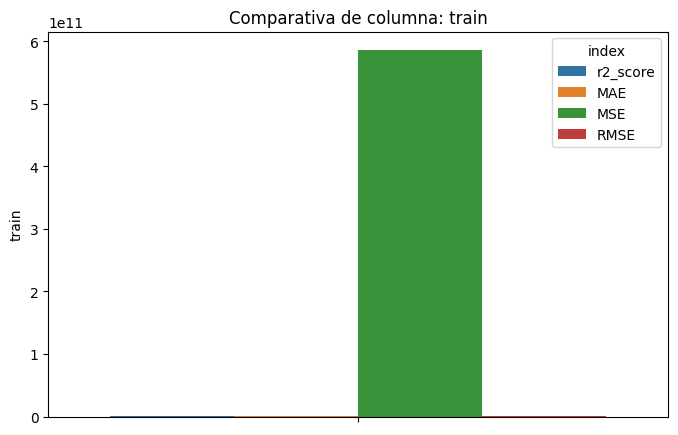

In [20]:
visualizar_datos(df_metricas,"train")

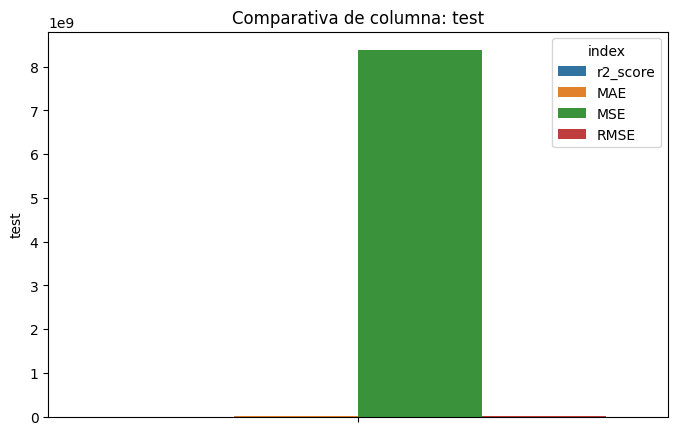

In [21]:
visualizar_datos(df_metricas,"test")

***Debido a la distribucion de los datos, que no son lineales, creo que el metodo linear_model.LinearRegression(), no es el correcto para hacer un modelo con estos datos, debemos seguir explorando otros formas de llegar al objetivo***